In [28]:
# Use the UCI Dow-Jones Index data set to predict this week's
# closing price using just the opening price.
# Loosely based on chapter 23 in Machine Learning Mastery Deep Learning with Python.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
np.random.seed(7)

df = pd.read_csv('./data/dow_jones_index.data')
subset = df[['date', 'open', 'close']]

# X are the open prices, y are the close prices.
X = subset['open'].values
y = subset['close'].values

# Remove the dollar sign and cast to floats.
X = [float(s.replace('$', '')) for s in X]
y = [float(s.replace('$', '')) for s in y]

# Split sequentially (otherwise would have used sklearn test_train_split)
trainPercent = 0.67
trainCount = round(len(X) * trainPercent)
X_train = X[:trainCount]
y_train = y[:trainCount]
X_test = X[trainCount:]
y_test = y[trainCount:]

# Just one input for now.
input_dim = 1

# Define and compile the model.
model = Sequential()
model.add(Dense(8, input_dim=input_dim, activation='relu')) # Hidden layer with 1 input, 8 neurons.
model.add(Dense(8, activation='relu'))                      # Hidden layer with 8 neurons.
model.add(Dense(1))                                         # Output layer with 1 output.
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, nb_epoch=200, batch_size=2, verbose=0)

trainScore = model.evaluate(X_train, y_train, verbose=0)
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 2.26 MSE (1.50 RMSE)
Test Score: 1.64 MSE (1.28 RMSE)


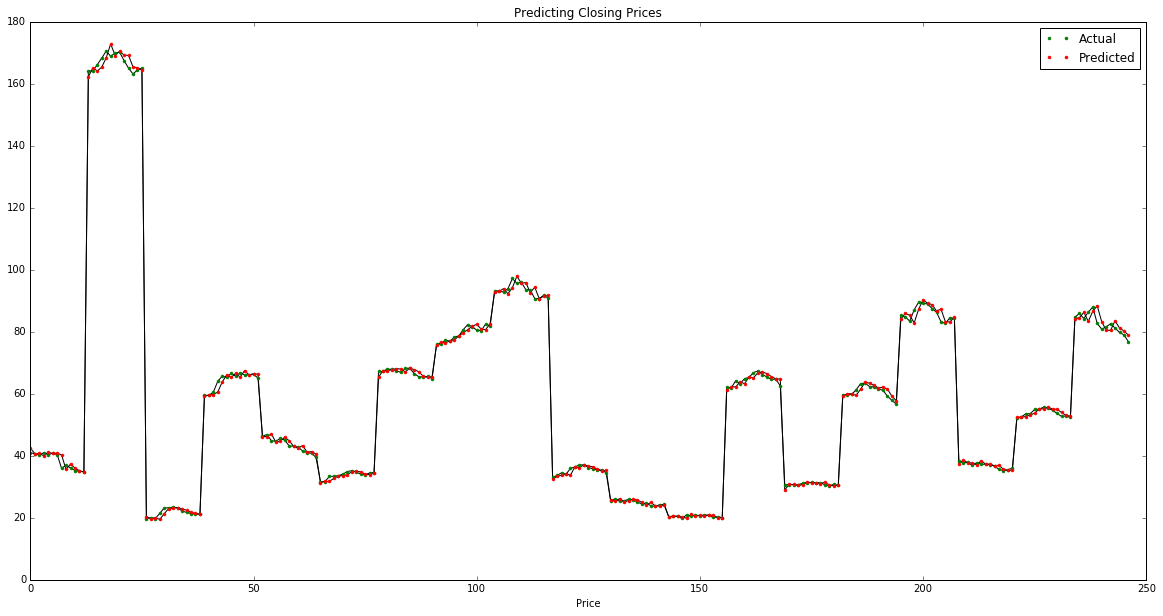

In [29]:
# Plot the results; assumes prior cell has been run.
# It actually does surprisingly well.
testPredict = model.predict(X_test)

plt.figure(figsize=(20,10))
plt.title('Predicting Closing Prices')
plt.plot(y_test, 'k-')
plt.plot(testPredict, 'k-')
plt.plot(y_test, 'g.', label='Actual')
plt.plot(testPredict, 'r.', label='Predicted')
plt.xlabel('Time')
plt.xlabel('Price')
plt.legend()
plt.show()